In [1]:
import altair as alt
import os
import pandas as pd
import scipy.io

from simulation_viz.simulation_viz.import_simulation_data import load_simulation, get_time_series_quartiles
from simulation_viz.simulation_viz.visualize_simulations import plot_ensemble
from simulation_viz.simulation_viz.visualize_simulations_interactive import plot_ensemble_interactive
alt.data_transformers.enable('default', max_rows=None)

DataTransformerRegistry.enable('default')

**In order to save memory, in this notebook you can only visualize median results (line) and the respective interquartile ranges (shaded areas).**

### Define path to the folder that contains the simulation results and model ensemble

In [2]:
raw_data_dir = '../io/output'

### Define the model name

In [3]:
model_name = 'toy_model'

### Define the simulation name

In [4]:
simulation_name = 'toy_model'

### Define number of models to be simulated

In [5]:
n_models = 5

### Load and process data

In [6]:
mat, ref_conc_dic, ref_flux_dic, met_names, rxn_names = load_simulation(raw_data_dir, model_name, simulation_name, n_models)

To get absolute concentrations set quant_type='conc_abs', to get relative concentrations set quant_type='conc_rel'.

To get absolute fluxes set quant_type='flux_abs', to get relative fluxes set quant_type='flux_rel'.

In [7]:
quant_type = 'conc_abs'
conc_quartiles_df = get_time_series_quartiles(mat, met_names, n_models, ref_conc_dic, quant_type)

total time: 0.009046554565429688
There were a total of 0 missing models out of 5.


In [8]:
quant_type = 'flux_abs'
flux_quartiles_df = get_time_series_quartiles(mat, rxn_names, n_models, ref_flux_dic, quant_type)

total time: 0.010430097579956055
There were a total of 0 missing models out of 5.


In [9]:
conc_quartiles_df.head()

,time_point,met,q025,median,q075
0,1.000000e-10,m5,0.000003,0.000004,0.000004
1,1.261857e-10,m5,0.000003,0.000004,0.000004
2,1.592283e-10,m5,0.000003,0.000004,0.000004
3,2.009233e-10,m5,0.000003,0.000004,0.000004
4,2.535364e-10,m5,0.000003,0.000004,0.000004


In [10]:
flux_quartiles_df.head()

,time_point,rxn,q025,median,q075
0,1.000000e-10,r1,7.187959,7.188126,7.189375
1,1.261857e-10,r1,7.187959,7.188126,7.189375
2,1.592283e-10,r1,7.187959,7.188126,7.189375
3,2.009233e-10,r1,7.187959,7.188126,7.189375
4,2.535364e-10,r1,7.187959,7.188126,7.189375


### Plot summarized results for whole ensemble with matplotlib

To plot absolute concentrations set quant_type='conc_abs', to plot relative concentrations set quant_type='conc_rel'.

To plot absolute fluxes set quant_type='flux_abs', to plot relative fluxes set quant_type='flux_rel'.

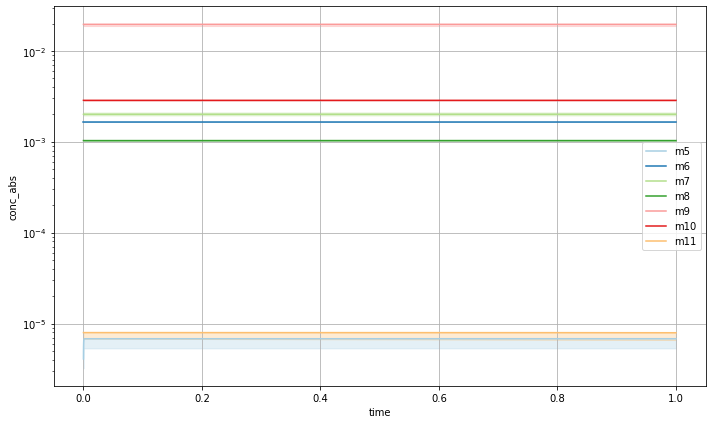

In [11]:
x_lim = None
y_lim = None

plot_ensemble(conc_quartiles_df, quant_type='conc_abs', selected_data=[met_names], x_scale='linear',
              y_scale='log', x_lim=x_lim, y_lim=y_lim, fig_size=(10,6), save_plot=False, output_file=None)

/home/mrama/GRASP_test/GRASP/visualization/simulation_viz/simulation_viz/visualize_simulations.py:70: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set_yscale(y_scale)


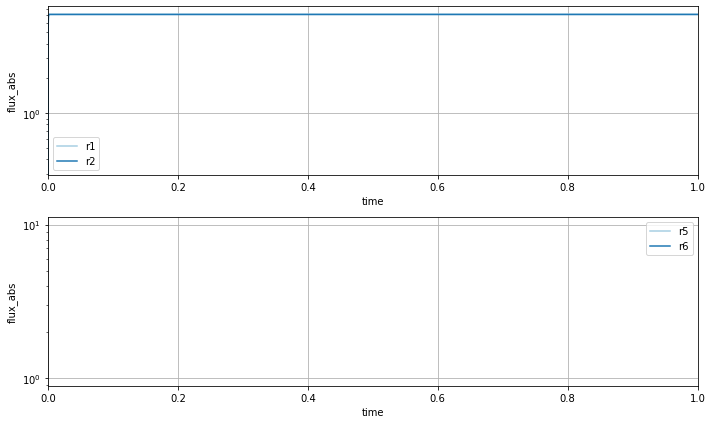

In [12]:
x_lim = [0, 1]
y_lim = None

plot_ensemble(flux_quartiles_df, quant_type='flux_abs', selected_data=[['r1', 'r2'], ['r5', 'r6']], x_scale='linear',
              y_scale='log', x_lim=x_lim, y_lim=y_lim, fig_size=(10,6), save_plot=False, output_file=None)

### Plot summarized results for whole ensemble with altair

To plot absolute concentrations set quant_type='conc_abs', to plot relative concentrations set quant_type='conc_rel'.

To plot absolute fluxes set quant_type='flux_abs', to plot relative fluxes set quant_type='flux_rel'.

In [13]:
plot_ensemble_interactive(conc_quartiles_df, quant_type='conc_abs', selected_data=met_names, x_scale='linear',
                          y_scale='log', x_lim=None, y_lim=None)

alt.LayerChart(...)

In [14]:
plot_ensemble_interactive(flux_quartiles_df, quant_type='flux_abs', selected_data=rxn_names, x_scale='linear',
                          y_scale='linear', x_lim=None, y_lim=None)

alt.LayerChart(...)